# 영화 데이터 수집 프로젝트 

# 0.라이브러리 불러오기

In [9]:
import requests
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import re
import os
from IPython.display import display

## 1. 영화 사이트 요청 및 파싱

In [4]:
movie_ranking = requests.get("https://www.moviechart.co.kr/rank/realtime/index/image")
if movie_ranking.status_code == 200:
    soup = BeautifulSoup(movie_ranking.content, 'html.parser')

## 2. 저장 디렉토리 준비, 파일명 규칙 생성

In [5]:
image_dir = 'images'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
pattern = r'[\\/:"*?<>|]'

## 3. 영화 제목, 이미지 태그 추출

In [6]:
title_list = soup.select(".movieBox-list .movie-title a")
image_list = soup.select(".movieBox-list .movieBox-item img")

## 4. 이미지 수집 및 저장 프로세스

In [7]:
for title, image in zip(title_list, image_list):
    image_src = image.get('src')
    image_response = requests.get("https://www.moviechart.co.kr" + image_src)
    img = Image.open(BytesIO(image_response.content))
    image_filename = re.sub(pattern, '', title.text)
    img.save(os.path.join(image_dir, image_filename + ".png"))

## 5. 영화 랭킹, 포스터 자동 수집

In [13]:
print(f"수집한 영화 수: {len(title_list)}")

수집한 영화 수: 20


랭킹: 1
제목: 좀비딸


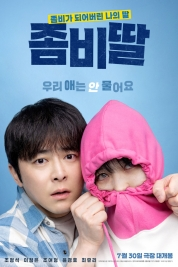

------------------------------
랭킹: 2
제목: F1 더 무비


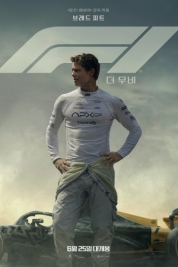

------------------------------
랭킹: 3
제목: 전지적 독자 시점


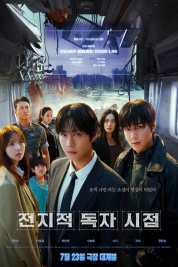

------------------------------
랭킹: 4
제목: 킹 오브 킹스


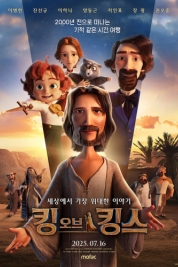

------------------------------
랭킹: 5
제목: 판타스틱 4: 새로운 출발


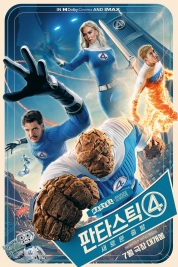

------------------------------
랭킹: 6
제목: 악마가 이사왔다


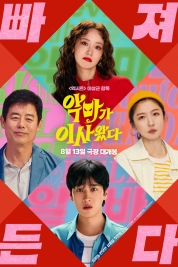

------------------------------
랭킹: 7
제목: 명탐정 코난: 척안의 잔상


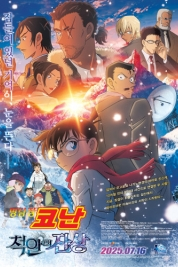

------------------------------
랭킹: 8
제목: 발레리나


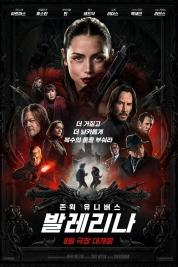

------------------------------
랭킹: 9
제목: 배드 가이즈 2


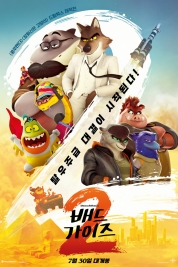

------------------------------
랭킹: 10
제목: 베베핀 극장판: 사라진 베베핀과 핑크퐁 대모험


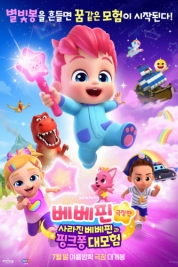

------------------------------
랭킹: 11
제목: 쥬라기 월드: 새로운 시작


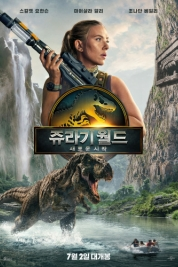

------------------------------
랭킹: 12
제목: 노이즈


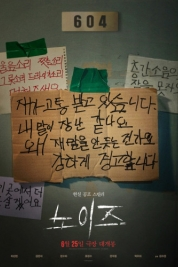

------------------------------
랭킹: 13
제목: 콘스탄틴


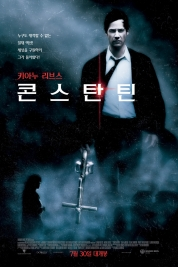

------------------------------
랭킹: 14
제목: 극장판 도라에몽: 진구의 그림이야기


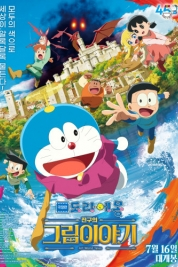

------------------------------
랭킹: 15
제목: 꼬마마법사 주니토니


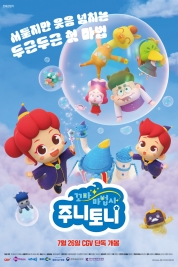

------------------------------
랭킹: 16
제목: 고고다이노 극장판: 게코도마뱀의 꿈


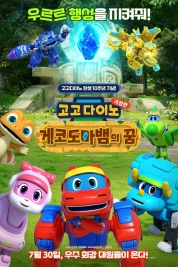

------------------------------
랭킹: 17
제목: 슈퍼맨


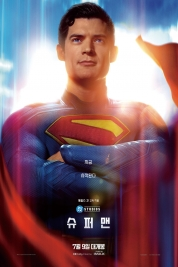

------------------------------
랭킹: 18
제목: 미세리코르디아


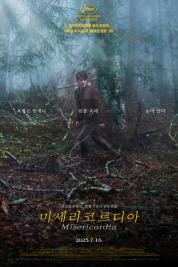

------------------------------
랭킹: 19
제목: 강령: 귀신놀이


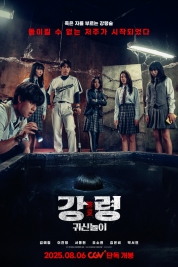

------------------------------
랭킹: 20
제목: 추적


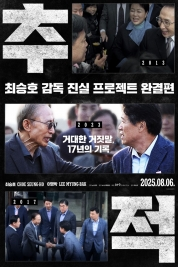

------------------------------


In [12]:
base_url = "https://www.moviechart.co.kr"
ranking_url = base_url + "/rank/realtime/index/image"
image_dir = "images"
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# 1. 실시간 사이트에서 HTML 가져오기
resp = requests.get(ranking_url)
soup = BeautifulSoup(resp.content, 'html.parser')

# 2. 영화 제목과 이미지 경로 리스트 파싱
title_tags = soup.select(".movieBox-list .movie-title a")
img_tags = soup.select(".movieBox-list .movieBox-item img")

movies = []
for rank, (title_tag, img_tag) in enumerate(zip(title_tags, img_tags), 1):
    title = title_tag.text.strip()
    img_src = img_tag.get('src')
    if not img_src.startswith("http"):
        img_url = base_url + img_src
    else:
        img_url = img_src
    # 파일명 정제
    import re
    pattern = r'[\\/:"*?<>|]'
    filename = re.sub(pattern, '', title) + ".png"
    filepath = os.path.join(image_dir, filename)
    # 필요시 이미지 새로 저장
    if not os.path.exists(filepath):
        img_resp = requests.get(img_url)
        img = Image.open(BytesIO(img_resp.content))
        img.save(filepath)
    # 리스트에 저장
    movies.append({'rank': rank, 'title': title, 'filepath': filepath})

# 3. 랭킹, 제목, 이미지 동시 출력
for movie in movies:
    print(f"랭킹: {movie['rank']}")
    print(f"제목: {movie['title']}")
    img = Image.open(movie['filepath'])
    display(img)
    print('-' * 30)

# 6. 결론

실시간 영화 랭킹과 포스터 이미지를 자동 수집, 저장하고,<br>
최신 정보를 효과적으로 시각화하는 파이프라인 구현<br>
신뢰성있는  멀티미디어데이터 확보하였다고 판단<br>
멀티미디어데이터 수집 프로젝트를 달성했다고 판단